In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import hopsworks
import pandas as pd
import numpy as np

In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/194723
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
df = pd.read_csv("Tools/GC=F.csv")
df

,Date,Close
0,2000-08-30,273.899994
1,2000-08-31,278.299988
2,2000-09-01,277.000000
3,2000-09-05,275.799988
4,2000-09-06,274.200012
...,...,...
5854,2023-12-29,2062.399902
5855,2024-01-02,2064.399902
5856,2024-01-03,2034.199951
5857,2024-01-04,2042.300049


In [5]:
df.info()
# the dtype of "type" column is object
# some elements are null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5859 non-null   object 
 1   Close   5859 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.7+ KB


In [6]:
# Assuming df is your original DataFrame
# If your Date column is not in datetime format, convert it first
# df['Date'] = pd.to_datetime(df['Date'])

# Create a new DataFrame with a complete date range
# date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
# complete_df = pd.DataFrame({'Date': date_range})

# Merge the original DataFrame with the complete date range DataFrame
# merged_df = pd.merge(complete_df, df, on='Date', how='left')

# Forward-fill missing values in the Close column
# merged_df['Close'] = merged_df['Close'].ffill()

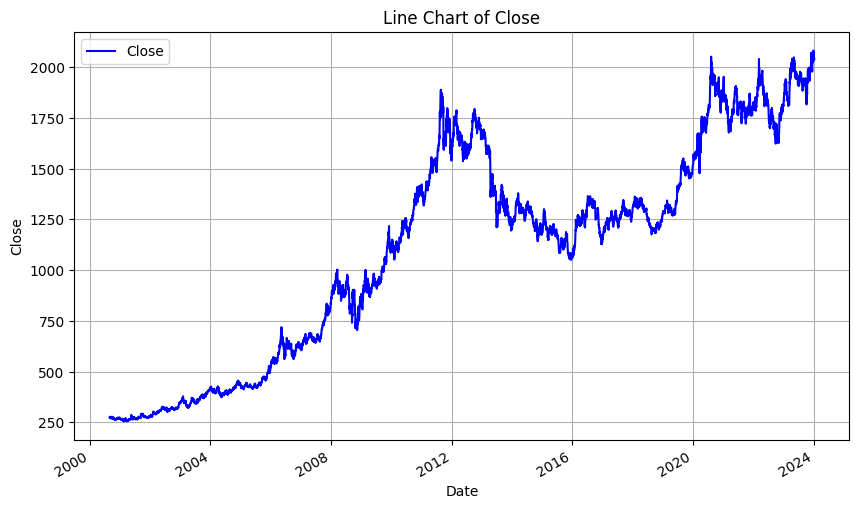

In [7]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'Close' column
# If your Date column is not in datetime format, convert it first
df['Date'] = pd.to_datetime(df['Date'])

# Create a line chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
df.plot(x='Date', y='Close', kind='line', linestyle='-', color='blue', ax=plt.gca())
plt.title('Line Chart of Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()

### Insert our Wine DataFrame into a FeatureGroup
Let's write our historical wine feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [8]:
gold_fg = fs.get_or_create_feature_group(
    name="gold",
    version=1,
    # remember to change the version if we want to modify the feature group
    primary_key=["Date","Close"], 
    description="Gold dataset")
gold_fg.insert(df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/194723/fs/194642/fg/391533


Uploading Dataframe: 0.00% |          | Rows 0/5859 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: gold_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/194723/jobs/named/gold_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x14d47b520>, None)